In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_df=pd.read_csv(mouse_drug_data_to_load)
mousedrug_df.head()


trial_df=pd.read_csv(clinical_trial_data_to_load)

trial_df.head()
# Combine the data into a single dataset
merged_df=pd.merge(trial_df,mousedrug_df, on='Mouse ID',how='left')
merged_df.head()
# Display the data table for preview
merged_df.head(10000)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_df=merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avgTumorVol=grouped_df.mean()
# Convert to DataFrame
avgTumorVol
avgTumorVol_df=avgTumorVol.reset_index()
# Preview DataFrame
avgTumorVol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_SE=grouped_df.sem()
tumor_SE
# Convert to DataFrame
tumorSE_df=pd.DataFrame(tumor_SE)
tumorSE_df.reset_index(inplace=True)
# Preview DataFrame
tumorSE_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [8]:
# Minor Data Munging to Re-Format the Data Frames



#Df.pivot
p_avgTumorVol_df=avgTumorVol_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
p_avgTumorVol_df.head(20)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


### 

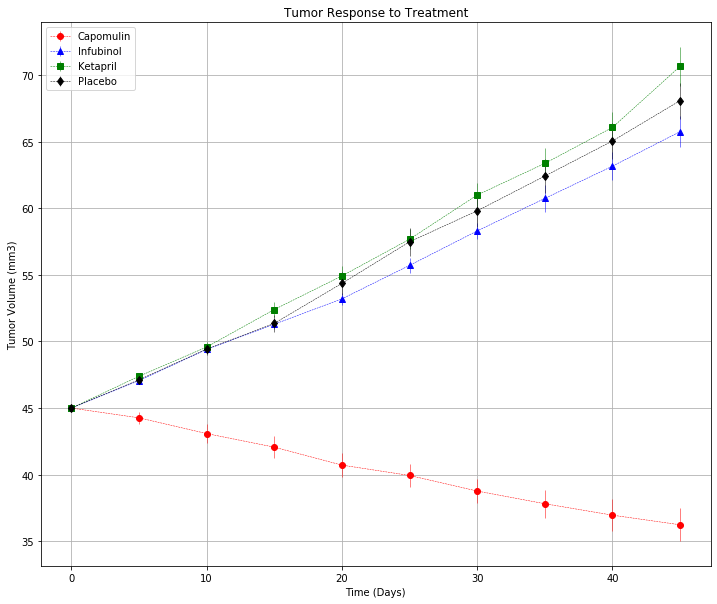

<Figure size 864x720 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: 'figures/tumor_response_to_treatment.png'

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate the Plot (with Error Bars)
##Create settings for the plot
#Include drug,markertype, and colort
drug_list = [('Capomulin','o','red'),
                    ('Infubinol','^','blue'),
                    ('Ketapril','s','green'),
                    ('Placebo','d','black')]
legend=[('Capomulin'),
       ('Infubinol'),
       ('Ketapril'),
       ('Placebo')]
plt.figure(figsize = (12,10))
for drug,marker,colors in drug_list:
    SE = tumor_SE[drug]
    tumorplot = plt.errorbar(p_avgTumorVol_df.index,p_avgTumorVol_df[drug],SE,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(legend,loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.figure(figsize = (12,10))
# Show the Figure
plt.show()
    
    # Save the Figure
plt.savefig(os.path.join('figures','tumor_response_to_treatment.png'))

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_metdf=merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_metdf=group_metdf.mean()

# Convert to DataFrame
avg_metdf=avg_metdf.reset_index()
# Preview DataFrame
avg_metdf.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_SE = group_metdf.sem()

# Convert to DataFrame
metSE_df = pd.DataFrame(met_SE)

# Preview DataFrame
metSE_df.reset_index(inplace=True)
metSE_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
p_avg_metdf=avg_metdf.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
p_avg_metdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


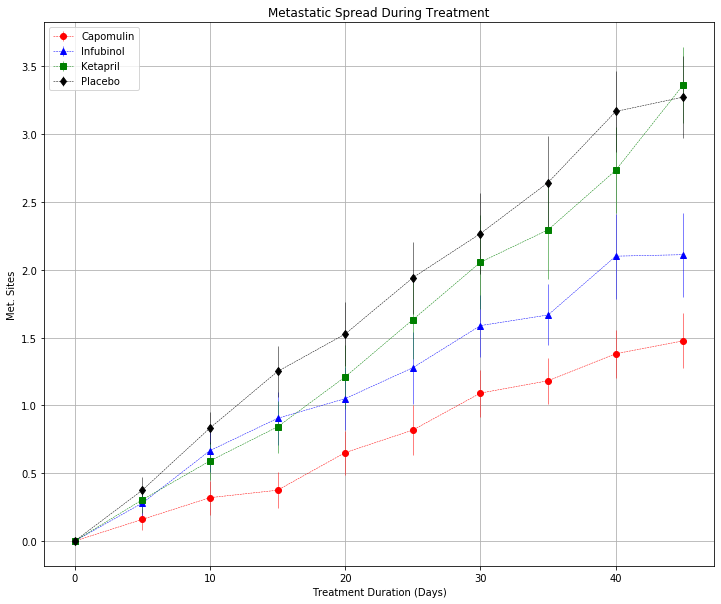

In [13]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (12,10))
for drug,marker,colors in drug_list:
    SE=met_SE[drug]
    met_t_plot=plt.errorbar(p_avg_metdf.index,p_avg_metdf[drug],SE,fmt=marker,ls='--',color=colors,linewidth=0.5)


# Show the Figure
plt.legend(legend,loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
#plt.savefig(os.path.join('figures','metastatic_spread_during_treatment.png'))

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupMouse_df=merged_df.groupby(['Drug','Timepoint'])['Mouse ID']

mouseCount_df=groupMouse_df.nunique()
#Convert from series to dataframe
mouseCount_df=pd.DataFrame(mouseCount_df)

# Reformat dataframe
mouseCount_df.reset_index(inplace=True)
mouseCount_df=mouseCount_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame

mouseCount_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
p_mouseCount_df=mouseCount_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
p_mouseCount_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


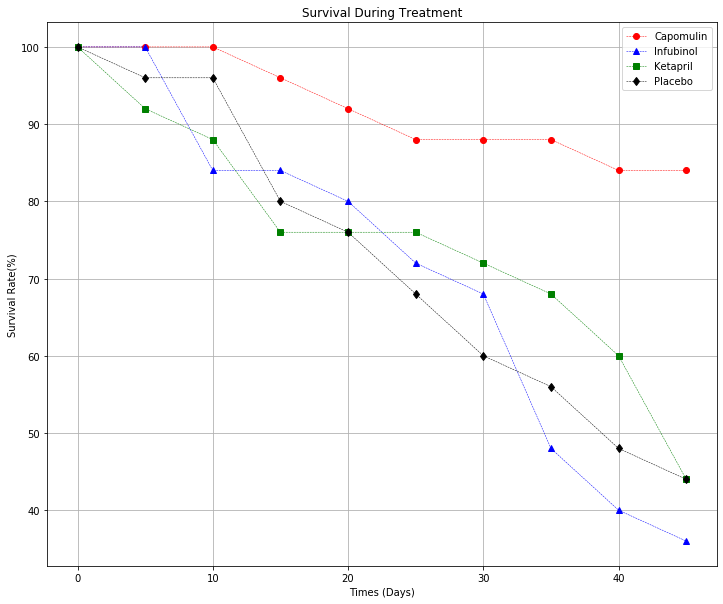

In [16]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (12,10))
for drug, marker,colors in drug_list:
    mouseCount=p_mouseCount_df[drug][0]
    survivalRate=(p_mouseCount_df[drug]/mouseCount)*100
    survivalTreatment_plt=plt.plot(p_mouseCount_df.index,survivalRate,
                                  marker=marker,LS='--',
                                  color=colors,linewidth=0.5)
# Show the Figure
plt.legend(legend,loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate(%)')
plt.grid()
# Savethe Figure

#plt.savefig(os.path.join('figures','survival_during_treatment.png'))

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
p_change=(p_avgTumorVol_df.iloc[-1]/(p_avgTumorVol_df.iloc[0])-1)*100
# Display the data to confirm
p_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [18]:
# Store all Relevant Percent Changes into a Tuple
p_change.index

#separate drug names in p_change
drugname= list(p_change.index)
drugname
#separate percentage change 
t_pchange= list(p_change.values)
t_pchange



[-19.47530266789417,
 42.51649185589741,
 46.12347172785185,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320634,
 -22.32090046276667,
 52.08513428789896,
 46.57975086509525]

![Metastatic Spread During Treatment](../Images/change.png)

In [19]:
tup_pctChange = (p_change['Capomulin'],
              p_change['Infubinol'],
              p_change['Ketapril'],
              p_change['Placebo'])
tup_pctChange

x_axis=np.arange(len(tup_pctChange))
y_axis=list(tup_pctChange)
y_axis = [round(x) for x in y_axis]
y_axis
x_axis


array([0, 1, 2, 3])

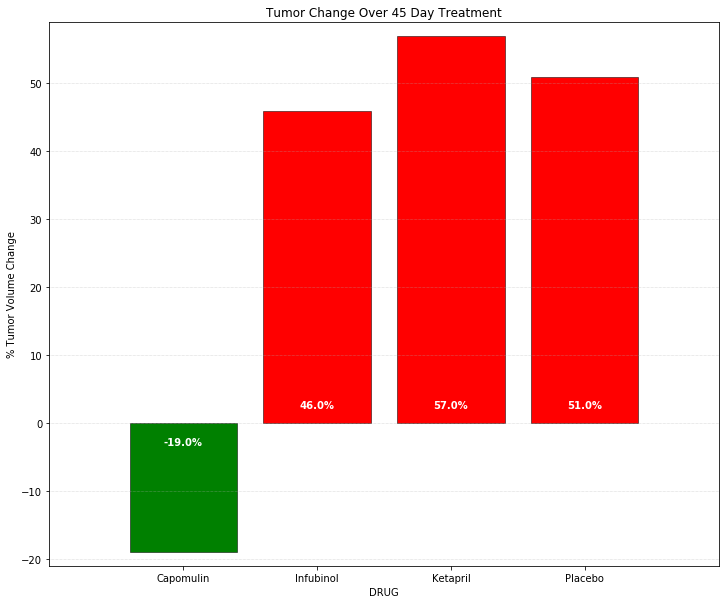

In [20]:
#Create visualization
colors = []
for  change in y_axis:
   if change < 0:
       colors.append('green')
   else:
       colors.append('red')
        
# Set up the bar graph
plt.figure(figsize = (12,10))
tumor_growth_bar = plt.bar(x_axis, y_axis, color=colors, alpha=1.0, edgecolor='black', linewidth=0.5)

# Set the plot title and axes titles
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('DRUG')

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])
# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y_axis)-2, max(y_axis)+2)
# Plot horizontal line at y=0
# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)
# Use functions to label the percentages of changes
def autolabel(rects):
   for i,rect in enumerate(rects):
       height = int(y_axis[i])
       if height >= 0:
           plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y_axis[i]),
               ha='center', va='bottom', color='white', weight='bold')
       else:
           plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y_axis[i]),
               ha='center', va='top', color='white', weight='bold')
# Call functions to implement the function calls
autolabel(tumor_growth_bar)
# Save the Figure
#plt.savefig(“Tumour_Change_OverTreatment.png”)
# Show the Figure
plt.show()







# Observations

In [ ]:
#1.The first figure, 'Tumor Response to Treatment' demonstrates that over time Capomulin had a higher effect on tumor size in mice compared to Infubinol,Ketapril, and definitely the Placebo.
#2. The second figure demonstrates Capomulin had the slowest metastatic spread compared to the remaining drugs, and placebos had the fasted spread compared to other drugs.
#3.The third figure demonstrates that Capomulin had the overall highest survival rate during treatment.